## 선형 회귀 모델(Linear Regression Model)
### 1. 데이터 생성

In [6]:
import torch
import matplotlib.pyplot as plt

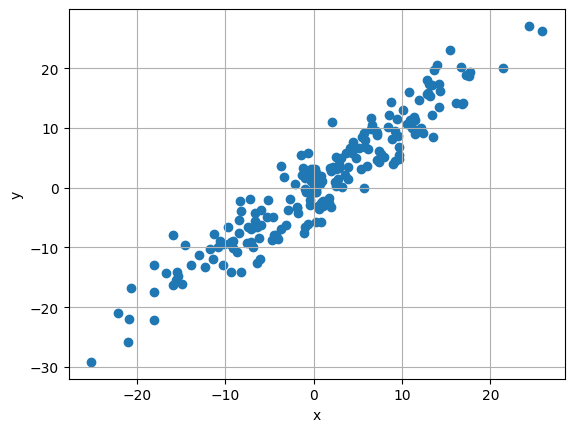

In [7]:
# 임의의 데이터 생성 
X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1)

# 데이터 시각화
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

### 2. 모델 정의 및 파라미터

In [8]:
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()   # 부모 클래스의 생성자를 호출하여 초기화
        self.linear = nn.Linear(1, 1)                   # 단일 선형 레이어 생성
    
    def forward(self, x):                   # 모델의 순전파 정의
        return self.linear(x)               # 선형 레이어에 입력 x를 전달하여 출력을 반환

In [9]:
model = LinearRegressionModel()             # 모델 생성
print(model)
print(list(model.parameters()))            # 모델의 파라미터 출력

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.3960]], requires_grad=True), Parameter containing:
tensor([0.5307], requires_grad=True)]


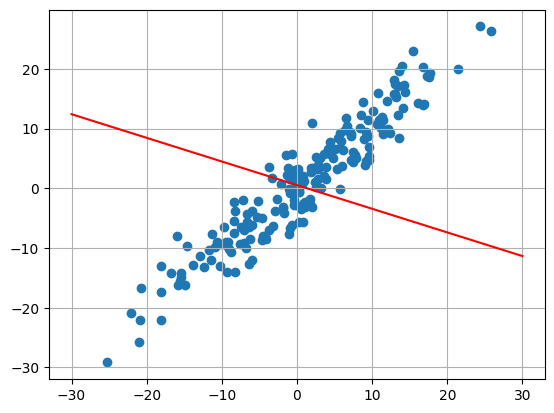

In [10]:
import numpy as np
w, b = model.parameters()                   # 모델의 파라미터 w, b를 가져옴
w1, b1 = w[0][0].item(), b[0].item()        # w, b를 각각 w1, b1에 할당
x1 = np.array([-30, 30])                    # x1은 -30부터 30까지의 범위    
y1 = w1 * x1 + b1                           # y1은 w1 * x1 + b1

plt.plot(x1, y1, c='r')                      # 빨간색 선으로 y1을 그림
plt.scatter(X, y)            # 산점도를 그림
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [11]:
criterion = nn.MSELoss()                     # 손실 함수 생성
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # SGD 옵티마이저 생성

### 모델 학습

In [12]:
epochs = 100                               # 에폭 설정
losses = []                                # 손실을 저장할 리스트 생성

for epoch in range(epochs):                # 에폭만큼 반복
    optimizer.zero_grad()                  # 기울기 초기화    
    y_pred = model(X)                      # 모델 예측
    loss = criterion(y_pred, y)            # 손실 계산
    losses.append(loss.item())             # 손실을 리스트에 추가
    loss.backward()                        # 역전파
    optimizer.step()                       # 가중치 업데이트
    print(f'에폭 [{epoch+1}/{epochs}], 손실: {loss.item():.4f}')

에폭 [1/100], 손실: 195.2797
에폭 [2/100], 손실: 132.9346
에폭 [3/100], 손실: 91.6081
에폭 [4/100], 손실: 64.2139
에폭 [5/100], 손실: 46.0551
에폭 [6/100], 손실: 34.0181
에폭 [7/100], 손실: 26.0390
에폭 [8/100], 손실: 20.7498
에폭 [9/100], 손실: 17.2436
에폭 [10/100], 손실: 14.9193
에폭 [11/100], 손실: 13.3784
에폭 [12/100], 손실: 12.3569
에폭 [13/100], 손실: 11.6797
에폭 [14/100], 손실: 11.2306
에폭 [15/100], 손실: 10.9327
에폭 [16/100], 손실: 10.7352
에폭 [17/100], 손실: 10.6041
에폭 [18/100], 손실: 10.5170
에폭 [19/100], 손실: 10.4592
에폭 [20/100], 손실: 10.4207
에폭 [21/100], 손실: 10.3951
에폭 [22/100], 손실: 10.3779
에폭 [23/100], 손실: 10.3664
에폭 [24/100], 손실: 10.3587
에폭 [25/100], 손실: 10.3534
에폭 [26/100], 손실: 10.3497
에폭 [27/100], 손실: 10.3472
에폭 [28/100], 손실: 10.3454
에폭 [29/100], 손실: 10.3440
에폭 [30/100], 손실: 10.3430
에폭 [31/100], 손실: 10.3422
에폭 [32/100], 손실: 10.3415
에폭 [33/100], 손실: 10.3409
에폭 [34/100], 손실: 10.3404
에폭 [35/100], 손실: 10.3399
에폭 [36/100], 손실: 10.3395
에폭 [37/100], 손실: 10.3390
에폭 [38/100], 손실: 10.3386
에폭 [39/100], 손실: 10.3382
에폭 [40/100], 손실: 10.3378
에폭 [41/

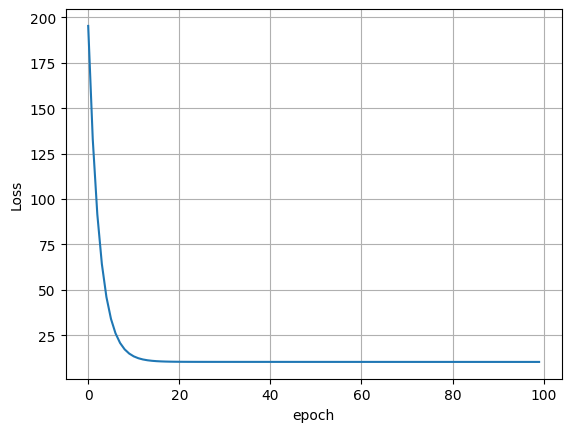

In [13]:
plt.plot(range(epochs), losses)            # 손실 그래프
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

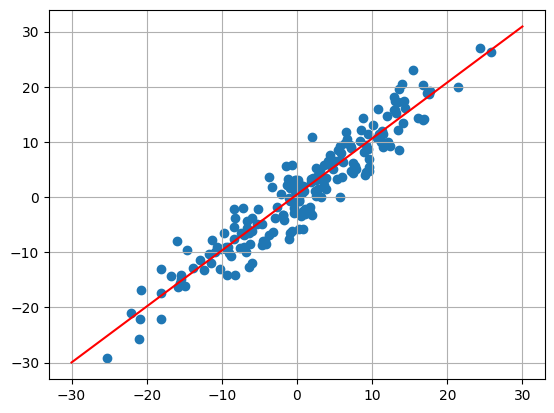

In [14]:
w1, b1 = w[0][0].item(), b[0].item()        # w, b를 각각 w1, b1에 할당
x1 = np.array([-30, 30])                    # x1은 -30부터 30까지의 범위    
y1 = w1 * x1 + b1                           # y1은 w1 * x1 + b1

plt.plot(x1, y1, c='r')                      # 빨간색 선으로 y1을 그림
plt.scatter(X, y)            # 산점도를 그림
plt.grid()
plt.show()